In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
# EDA

In [12]:
data = df.copy()

In [13]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
from dateutil import parser
data['date_added'] = data['date_added'].apply(lambda x: parser.parse(x, fuzzy=True) if pd.notnull(x) else None)

In [15]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [16]:
data['data_added_day'] = data['date_added'].dt.day

In [17]:
data['data_added_month'] = data['date_added'].dt.month

In [18]:
data['date_added_year'] = data['date_added'].dt.year

In [19]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


In [20]:
data.drop(['date_added'], axis=1, inplace=True)

In [21]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


In [22]:
data.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
date_added_year     float64
dtype: object

In [23]:
# Visualization

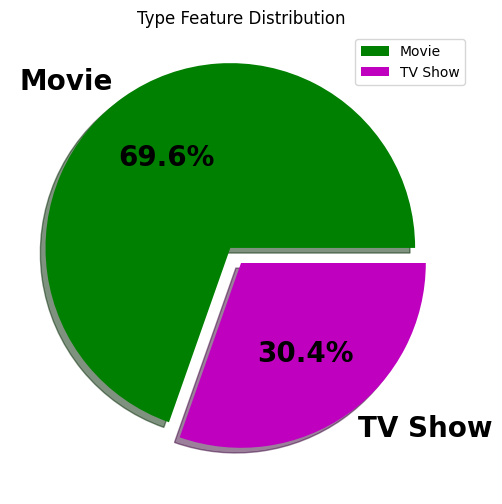

In [24]:
plt.figure(figsize=(10, 6)) 
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().keys(), explode=[0.1,0.0],autopct='%1.1f%%', textprops={'fontsize': 20, 'fontweight': 'bold'}, colors=['g', 'm'], shadow=True) 
plt.title('Type Feature Distribution')
plt.legend(loc = 1)
plt.show()

In [25]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


There are 8807 unique show IDs.


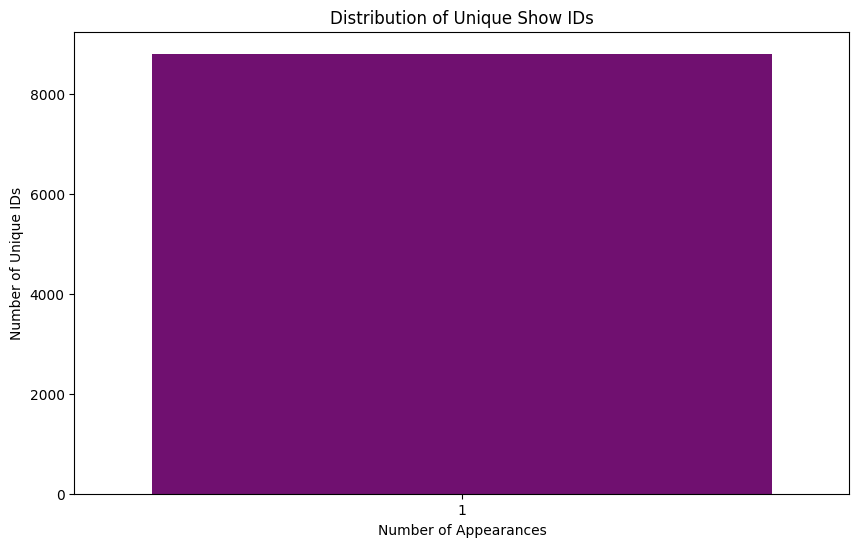

In [26]:
#Number of unique shows and ID
unique_show_ids = data['show_id'].nunique()
print(f"There are {unique_show_ids} unique show IDs.")

# Plot a count plot for the unique show IDs
show_id_counts = data['show_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x=show_id_counts.values, color='purple')
plt.xlabel('Number of Appearances')
plt.ylabel('Number of Unique IDs')
plt.title('Distribution of Unique Show IDs')
plt.show()

Top 10 most common titles:
title
Dick Johnson Is Dead                1
Ip Man 2                            1
Hannibal Buress: Comedy Camisado    1
Turbo FAST                          1
Masha's Tales                       1
Chelsea Does                        1
Ricardo O'Farrill Abrazo Genial     1
Ip Man                              1
Tom Segura: Mostly Stories          1
Team Foxcatcher                     1
Name: count, dtype: int64


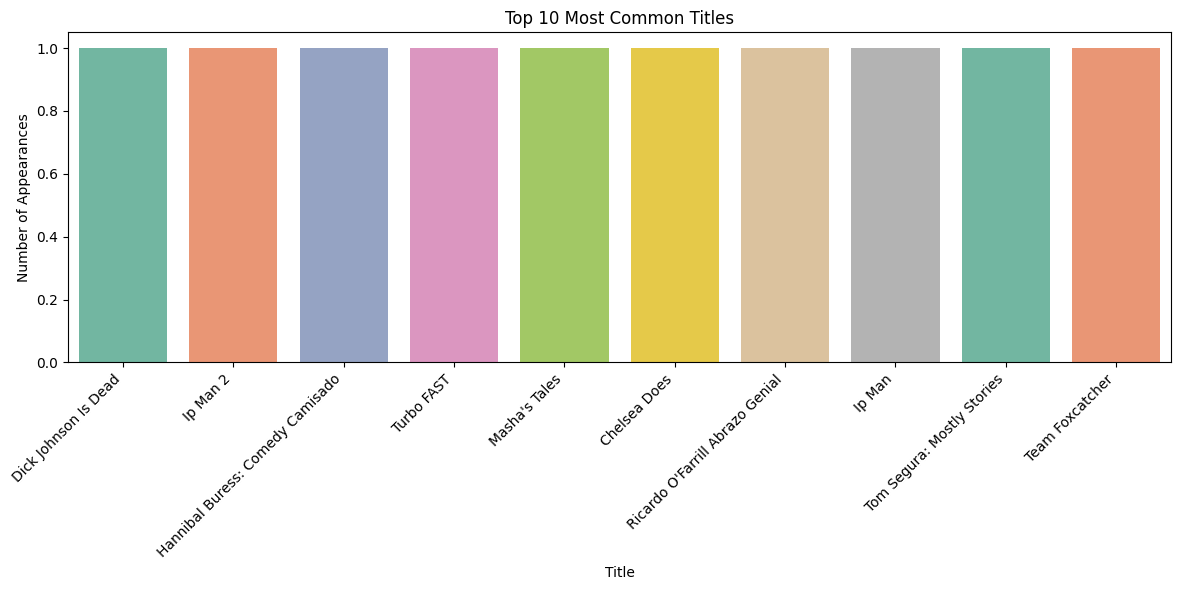

In [27]:
#top 10 most common titles
top_titles = data['title'].value_counts().head(10)
print("Top 10 most common titles:")
print(top_titles)

# Plot a bar plot for the top 10 most common titles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_titles.index, y=top_titles.values, palette='Set2')
plt.xlabel('Title')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Most Common Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 directors with the most content:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


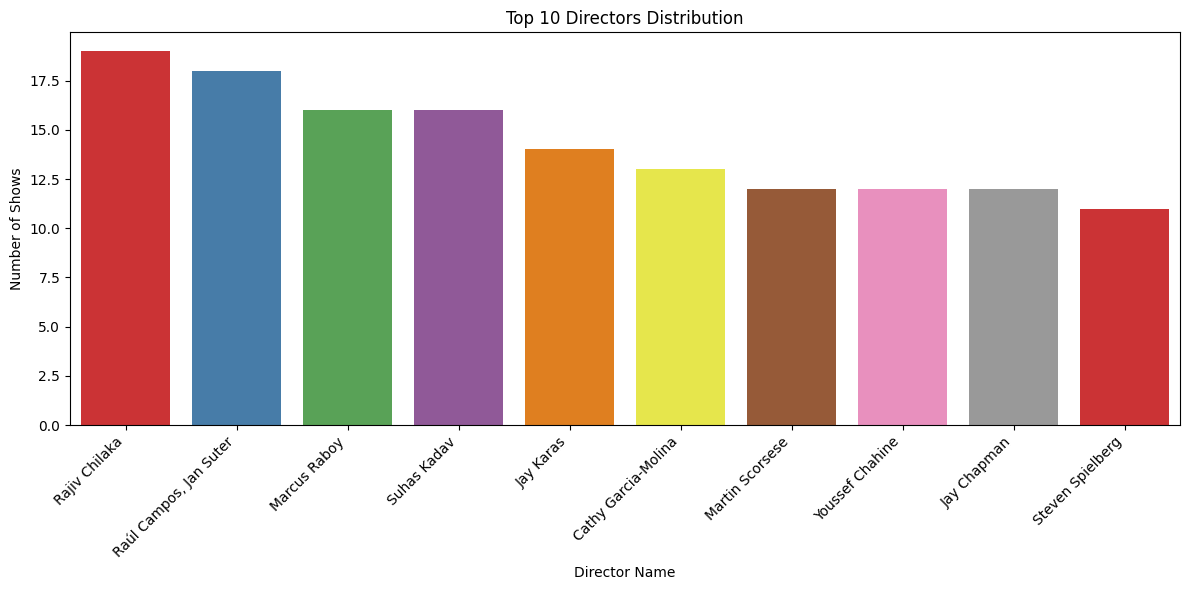

In [28]:
#top 10 directors with the most content
top_directors = data['director'].value_counts().head(10)
print("Top 10 directors with the most content:")
print(top_directors)

# Plot a bar plot for the top 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='Set1')
plt.xlabel('Director Name')
plt.ylabel('Number of Shows')
plt.title('Top 10 Directors Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 most common cast members:
cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Dora

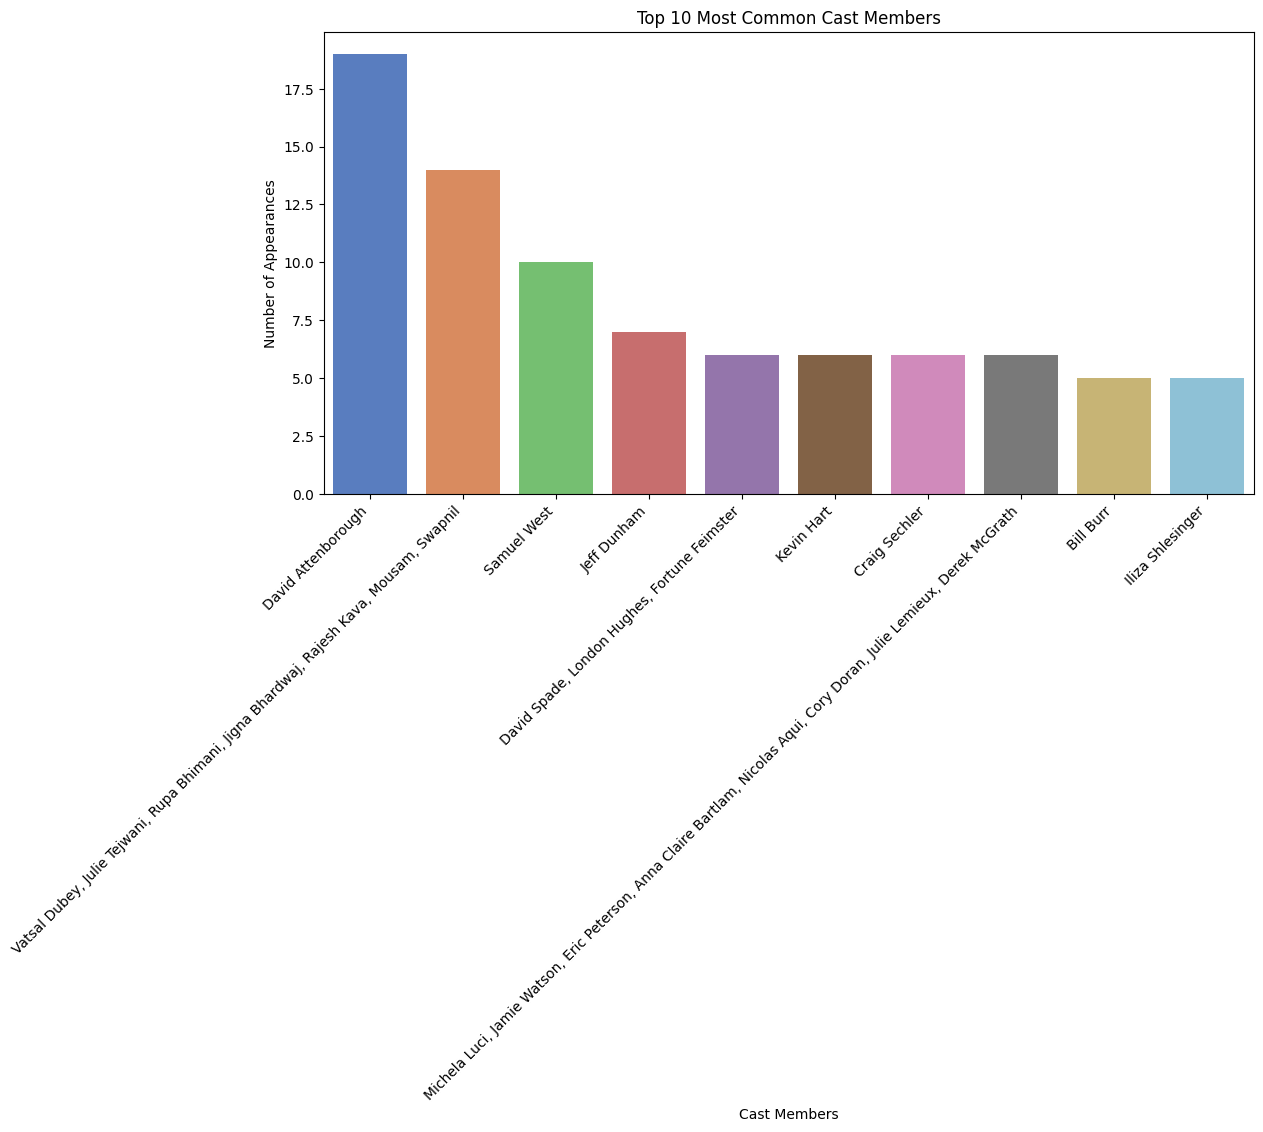

In [29]:
#top common cast members
top_cast = data['cast'].value_counts().head(10)
print("Top 10 most common cast members:")
print(top_cast)

# Plot a bar plot for the top 10 most common cast members
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cast.index, y=top_cast.values, palette='muted')
plt.xlabel('Cast Members')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Most Common Cast Members')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 countries represented in the dataset:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


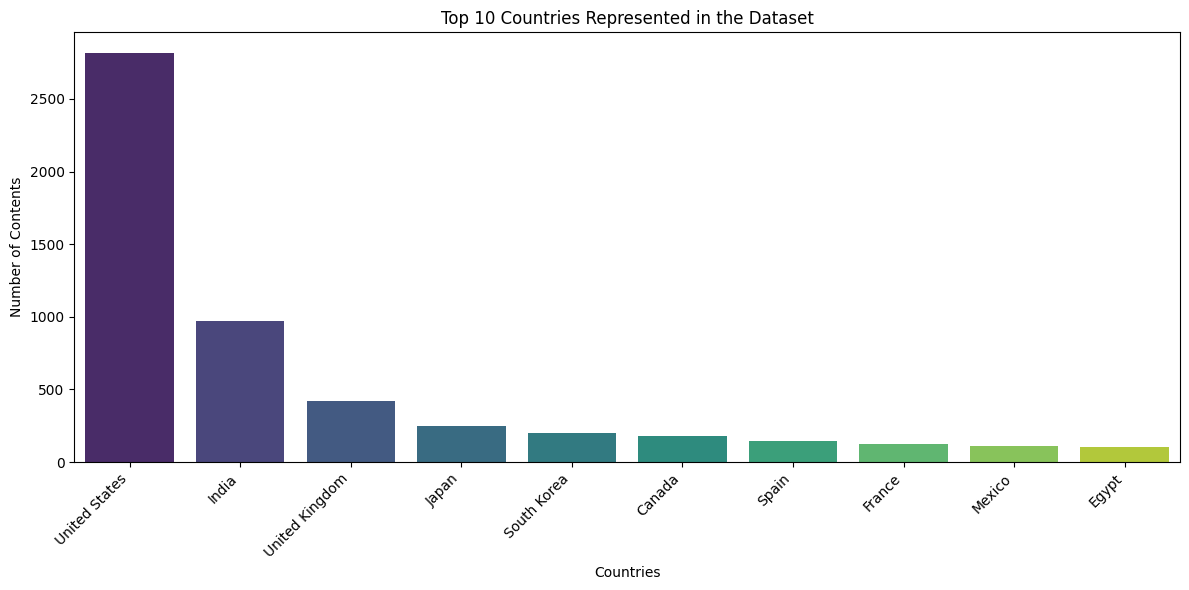

In [30]:
#top countries on the dataset
top_countries = data['country'].value_counts().head(10)
print("Top 10 countries represented in the dataset:")
print(top_countries)

# Plot a bar plot for the most represented countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='viridis')
plt.xlabel('Countries')
plt.ylabel('Number of Contents')
plt.title('Top 10 Countries Represented in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

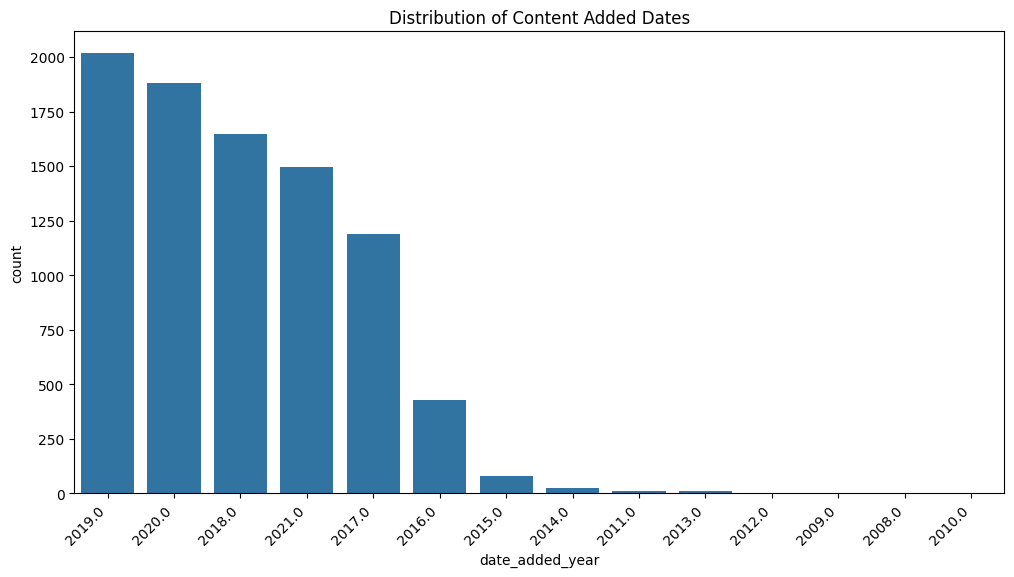

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='date_added_year', data=data, order=data['date_added_year'].value_counts().index)
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation=45, ha='right')
plt.show() 

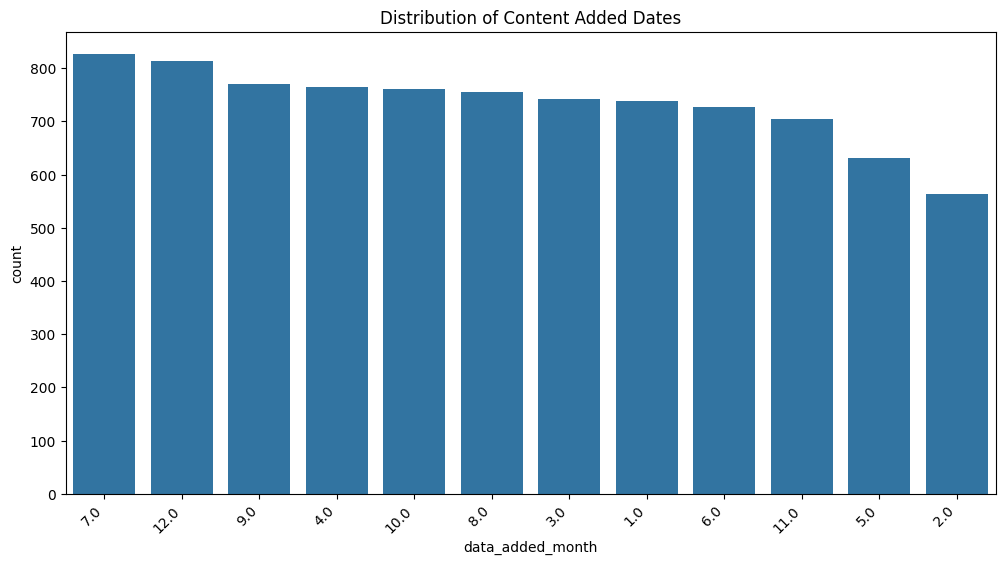

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='data_added_month', data=data, order=data['data_added_month'].value_counts().index)
plt.title('Distribution of Content Added Dates')
plt.xticks(rotation=45, ha='right')
plt.show()

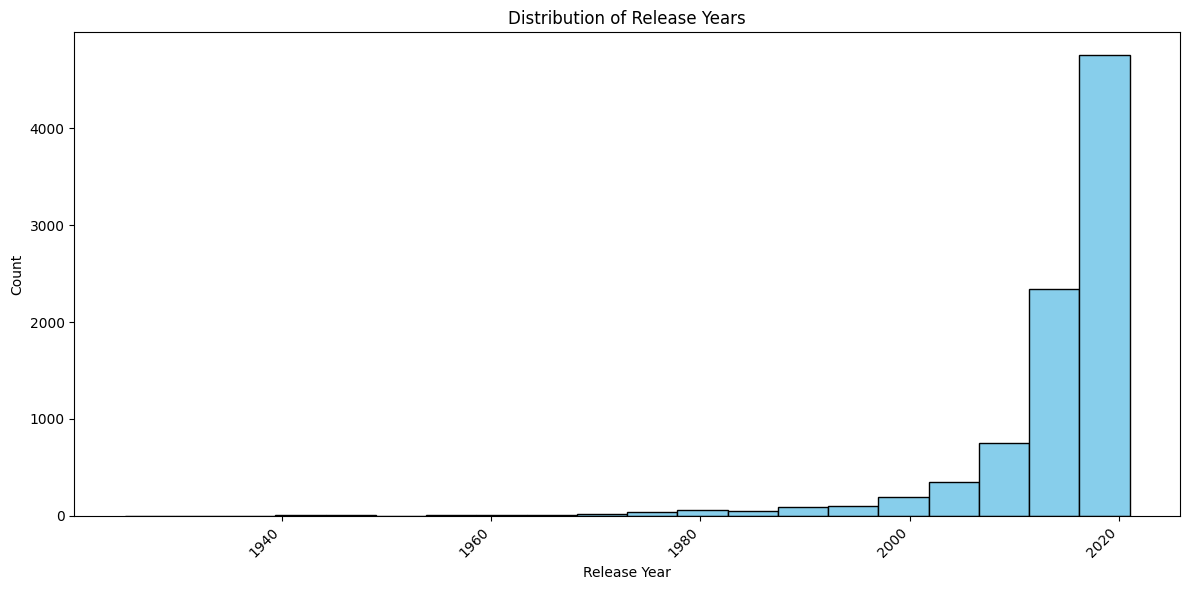

In [33]:
#distribution of release year
plt.figure(figsize=(12, 6))
plt.hist(data['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

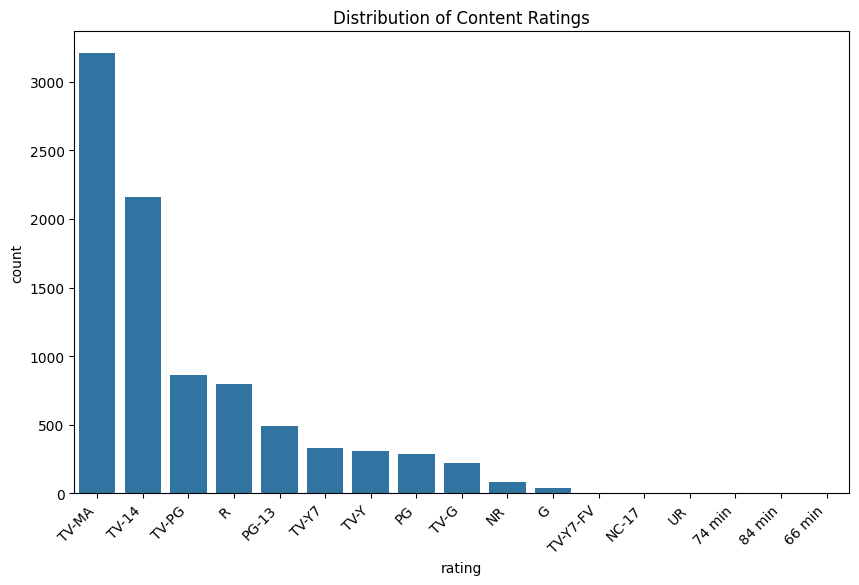

In [34]:
#distribution of content ratings
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

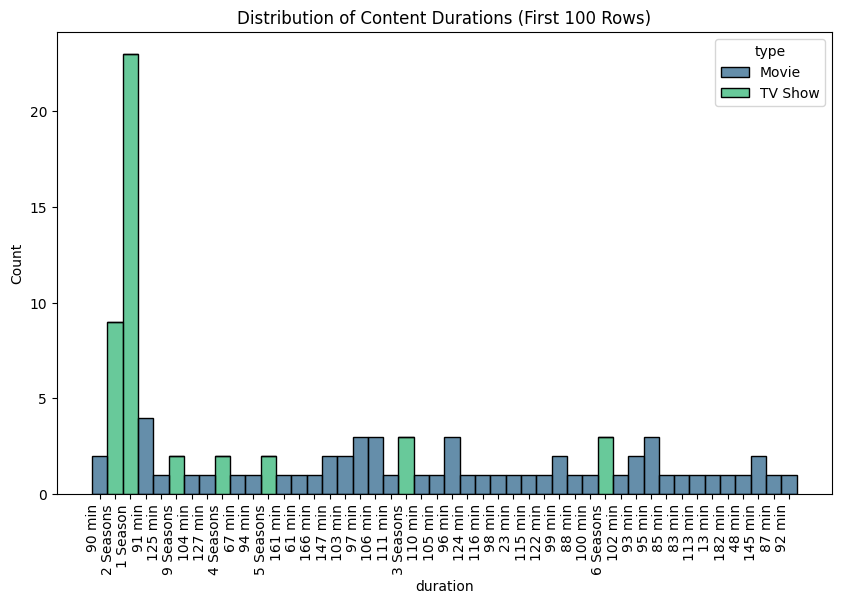

In [35]:
#distribution of content duration

subset_data = data.head(100)

plt.figure(figsize=(10,6))
sns.histplot(x='duration', data=subset_data, multiple='stack', hue='type', bins=20, palette='viridis')
plt.title('Distribution of Content Durations (First 100 Rows)')
plt.xticks(rotation=90, ha='right')
plt.show()

Top 10 most common content categories:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


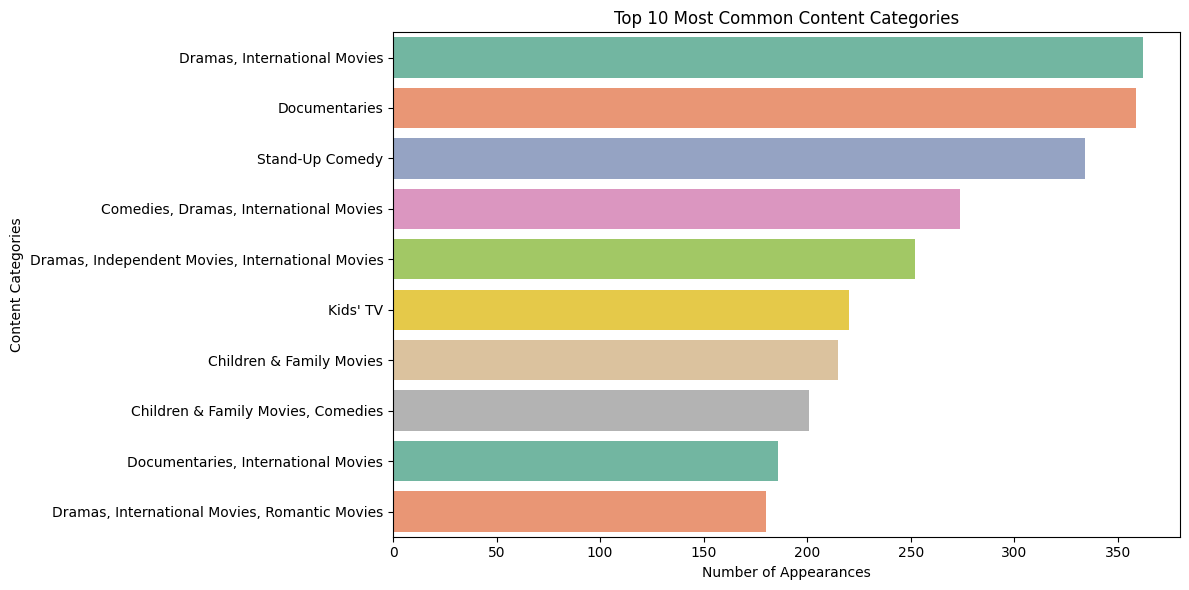

In [36]:
#top 10 most common content categories
top_categories = data['listed_in'].value_counts().head(10)
print("Top 10 most common content categories:")
print(top_categories)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set2')
plt.xlabel('Number of Appearances')
plt.ylabel('Content Categories')
plt.title('Top 10 Most Common Content Categories')
plt.tight_layout()
plt.show()

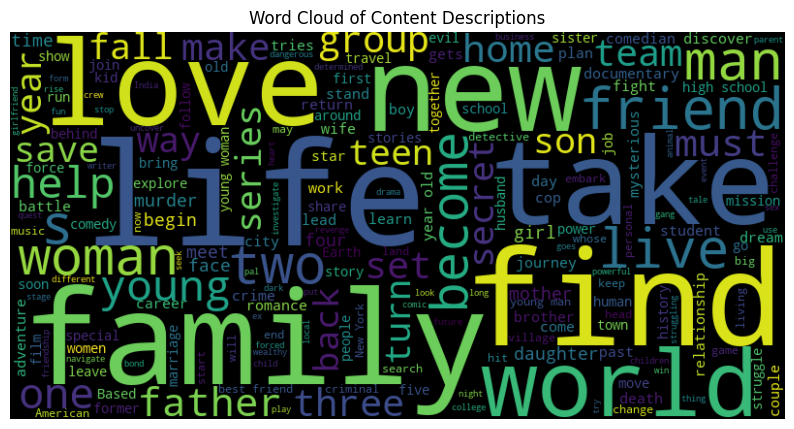

In [37]:
from wordcloud import WordCloud
text = ' '.join(data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Descriptions')
plt.show()

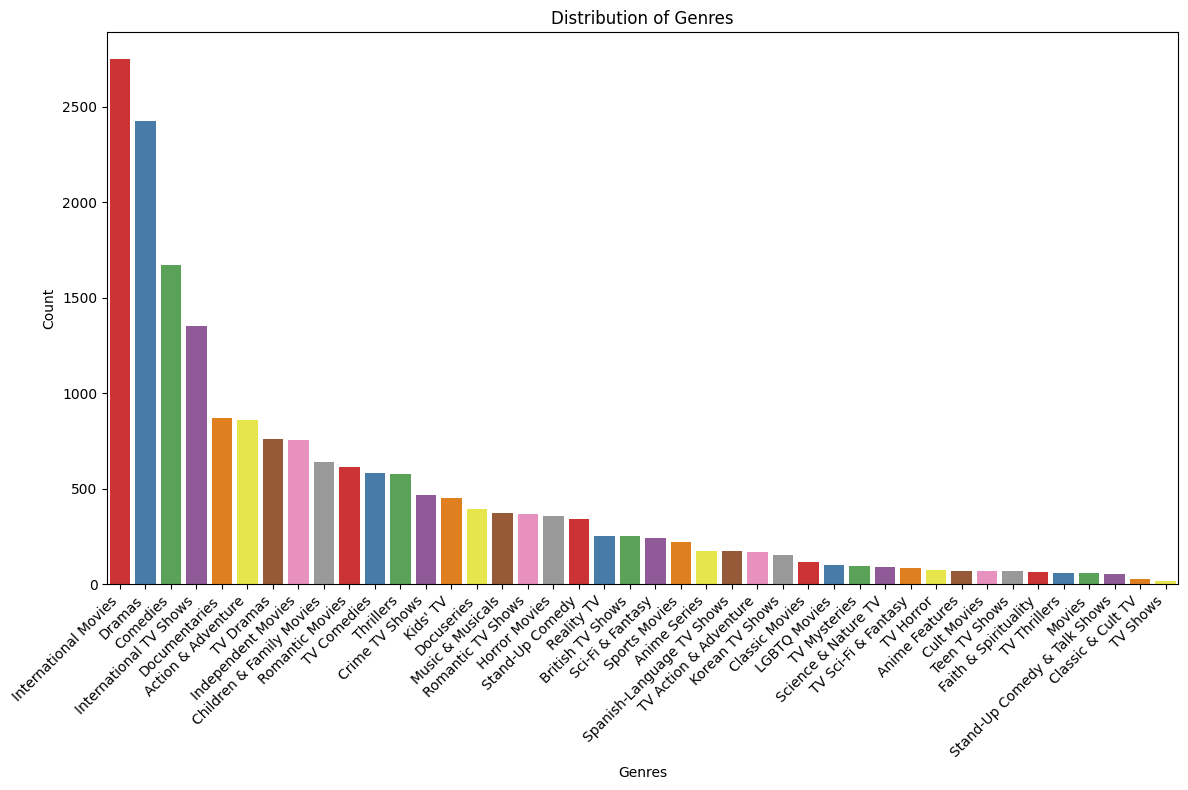

In [38]:
#genre distribution
genre_counts = data['listed_in'].dropna().apply(lambda x: x.split(', ')).explode().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set1')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

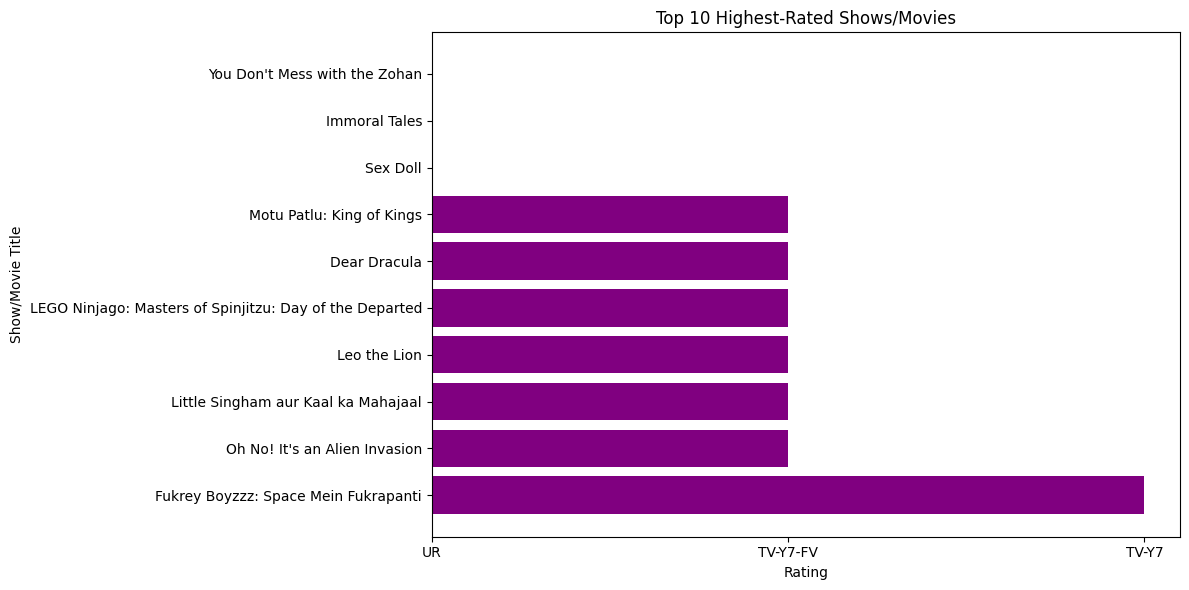

In [39]:
#top 10 highest rated shows
sorted_df = data.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(sorted_df['title'], sorted_df['rating'], color = 'purple')
plt.xlabel('Rating')
plt.ylabel('Show/Movie Title')
plt.title('Top 10 Highest-Rated Shows/Movies')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [40]:
#Data preprocessing

In [41]:
data.duplicated().sum()

0

In [42]:
data.select_dtypes(include='object').nunique()

show_id        8807
type              2
title          8807
director       4528
cast           7692
country         748
rating           17
duration        220
listed_in       514
description    8775
dtype: int64

In [43]:
data.isnull().sum()

show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
release_year           0
rating                 4
duration               3
listed_in              0
description            0
data_added_day        10
data_added_month      10
date_added_year       10
dtype: int64

In [44]:
# % of missing values
df = (data.isnull().sum()[data.isnull().sum() > 0]).to_frame().rename(columns={0:'Number of Missing Values'})
df['% of Missing Values'] = round(100 * data.isnull().sum()[data.isnull().sum() > 0] / len(data), 2)
df['% of Missing Values']

director            29.91
cast                 9.37
country              9.44
rating               0.05
duration             0.03
data_added_day       0.11
data_added_month     0.11
date_added_year      0.11
Name: % of Missing Values, dtype: float64

In [45]:
df

,Number of Missing Values,% of Missing Values
director,2634,29.91
cast,825,9.37
country,831,9.44
rating,4,0.05
duration,3,0.03
data_added_day,10,0.11
data_added_month,10,0.11
date_added_year,10,0.11


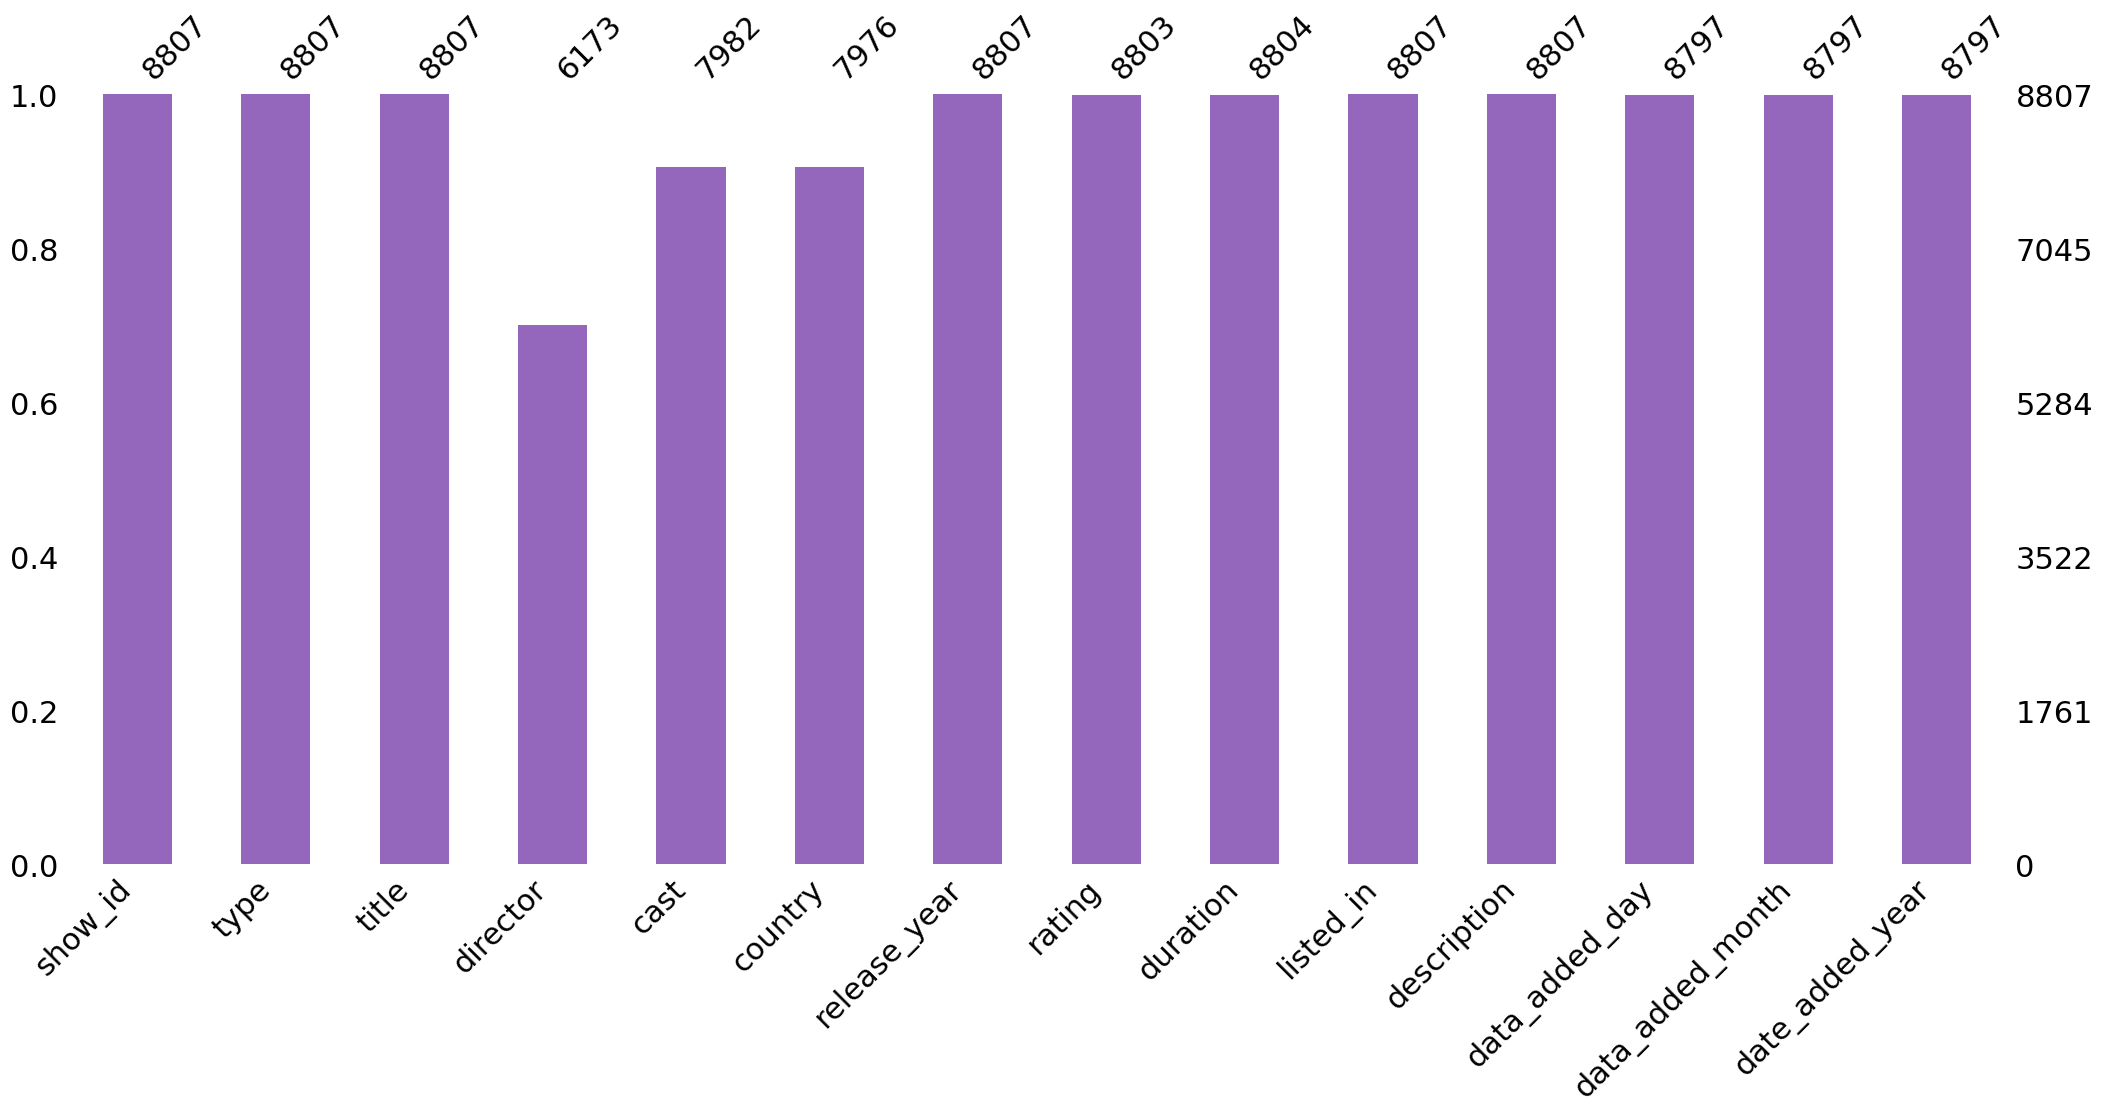

In [46]:
import missingno as msno

msno.bar(data, color='C4', fontsize=22)
plt.show()

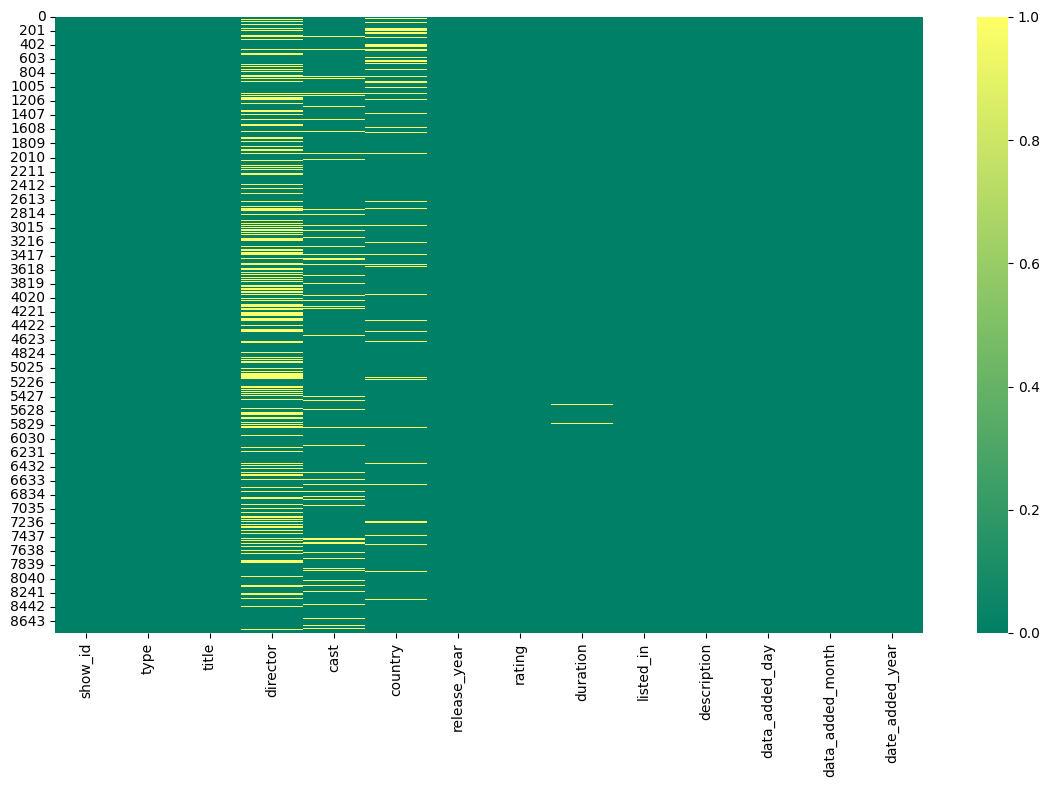

In [47]:
plt.figure(figsize=(14,8))
sns.heatmap(data.isnull(), cmap='summer')
plt.show()

In [48]:
data.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
date_added_year     float64
dtype: object

In [49]:
# handling missing values

In [50]:
cat_cols = [col for col in data.columns if data[col].dtype=='object']
num_cols = [col for col in data.columns if data[col].dtype!='object']

In [51]:
cat_cols

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'rating',
 'duration',
 'listed_in',
 'description']

In [52]:
num_cols

['release_year', 'data_added_day', 'data_added_month', 'date_added_year']

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
imputer1 = SimpleImputer(strategy = 'most_frequent')
imputer2 = SimpleImputer(strategy = 'median')

In [55]:
def fill_missing_no(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [56]:
fill_missing_no(data)

In [57]:
data.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
release_year        0
rating              0
duration            0
listed_in           0
description         0
data_added_day      0
data_added_month    0
date_added_year     0
dtype: int64

In [58]:
#feature encoding

In [59]:
cat_cols

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'rating',
 'duration',
 'listed_in',
 'description']

In [60]:
num_cols

['release_year', 'data_added_day', 'data_added_month', 'date_added_year']

In [61]:
data.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
release_year        float64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
date_added_year     float64
dtype: object

In [62]:
data['show_id'].nunique()

8807

In [63]:
data['type'].nunique()

2

In [64]:
data['title'].nunique()

8807

In [65]:
data['director'].nunique()

4528

In [66]:
data['cast'].nunique()

7692

In [67]:
data['country'].nunique()

748

In [68]:
data['rating'].nunique()

17

In [69]:
data['duration'].nunique()

220

In [70]:
data['listed_in'].nunique()

514

In [71]:
data['description'].nunique()

8775

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()

for col in ['show_id', 'type']:
    data[col] = le.fit_transform(data[col])

In [74]:
data.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,date_added_year
0,0,0,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,1111,1,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,2222,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0


In [75]:
data.dtypes

show_id               int32
type                  int32
title                object
director             object
cast                 object
country              object
release_year        float64
rating               object
duration             object
listed_in            object
description          object
data_added_day      float64
data_added_month    float64
date_added_year     float64
dtype: object

In [76]:
def target_guided_encoding(i_col, t_col): # Target guided encoding
    i_col_index = data.groupby([i_col])[t_col].mean().sort_values().index
    i_col_dict = {key:index for index , key in enumerate(i_col_index , 0)}
    data[i_col] = data[i_col].map(i_col_dict) 

In [77]:
target_guided_encoding('title', 'type')

In [78]:
target_guided_encoding('director', 'type')

In [79]:
target_guided_encoding('cast', 'type')

In [80]:
target_guided_encoding('country', 'type')

In [81]:
target_guided_encoding('rating', 'type')

In [82]:
target_guided_encoding('duration', 'type')

In [83]:
target_guided_encoding('listed_in', 'type')

In [84]:
target_guided_encoding('description', 'type')

In [85]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,date_added_year
0,0,0,4445,805,5421,593,2020.0,1,68,30,3913,25.0,9.0,2021.0
1,1111,1,8252,4353,5711,571,2021.0,12,216,316,7914,24.0,9.0,2021.0
2,2222,1,7327,4323,5657,593,2021.0,12,205,493,6707,24.0,9.0,2021.0
3,3333,1,6859,4353,5421,593,2021.0,12,205,417,7546,24.0,9.0,2021.0
4,4444,1,6688,4353,7339,558,2021.0,12,216,453,7167,24.0,9.0,2021.0


In [86]:
#outliers detection
def plot(df, col):
    # Create a larger figure
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Plot the distribution with kde
    sns.distplot(df[col], ax=ax1, color='b')
    ax1.set_title(f'Distribution of {col}')

    # Boxplot with custom whiskers
    sns.boxplot(df[col], ax=ax2, whis=1.5, color='g')
    ax2.set_title(f'Boxplot of {col}')

    # Distribution without kde (histogram)
    sns.histplot(df[col], ax=ax3, kde=False, bins=30, color='y')
    ax3.set_title(f'Histogram of {col}')

    # Apply log transformation if needed
    if (df[col] > 0).all():  # Check if all values are positive to avoid issues with log transformation
        ax1.set_yscale('log')
        ax3.set_yscale('log')

    plt.tight_layout()
    plt.show()

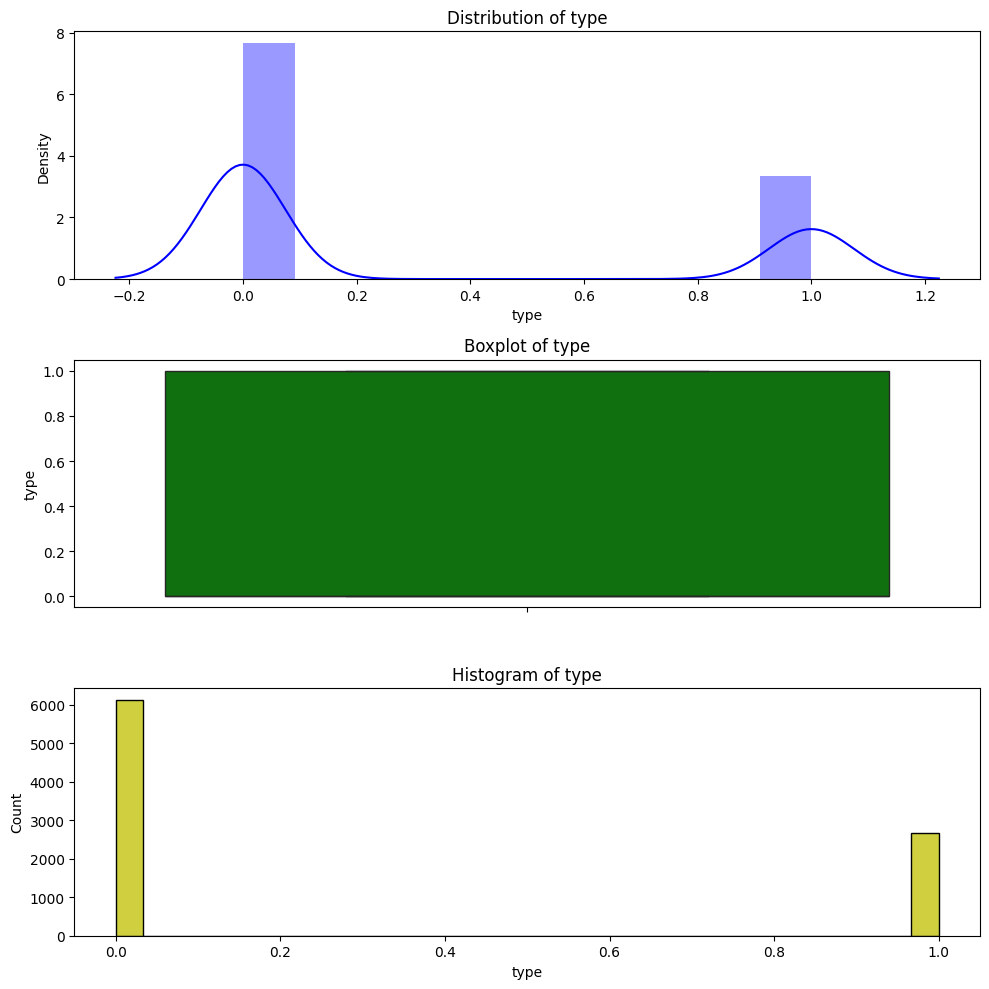

In [87]:
plot(data, 'type')

In [88]:
q1 = data['type'].quantile(0.25)
q3 = data['type'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [89]:
maximum

2.5

In [90]:
minimum

-1.5

In [91]:
[x for x in data['type'] if x> maximum or x<minimum] 

[]

In [92]:
len([x for x in data['type'] if x> maximum or x<minimum])


0

In [93]:
#feature selection

In [94]:
X = data.drop(['type'], axis=1)

In [95]:
y = data['type']

In [96]:
from sklearn.feature_selection import mutual_info_regression

In [97]:
imp = mutual_info_regression(X,y)

In [98]:
imp

array([0.04574045, 0.61393158, 0.52314169, 0.53948365, 0.10378088,
       0.02679575, 0.09612535, 0.61062456, 0.6097433 , 0.61361744,
       0.        , 0.        , 0.        ])

In [99]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [100]:
imp_df

,0
show_id,0.045740
title,0.613932
director,0.523142
cast,0.539484
country,0.103781
release_year,0.026796
rating,0.096125
duration,0.610625
listed_in,0.609743
description,0.613617


In [101]:
imp_df.columns = ['importance']

In [102]:
imp_df

,importance
show_id,0.045740
title,0.613932
director,0.523142
cast,0.539484
country,0.103781
release_year,0.026796
rating,0.096125
duration,0.610625
listed_in,0.609743
description,0.613617


In [103]:
imp_df.sort_values(by='importance', ascending=False)

,importance
title,0.613932
description,0.613617
duration,0.610625
listed_in,0.609743
cast,0.539484
director,0.523142
country,0.103781
rating,0.096125
show_id,0.045740
release_year,0.026796


In [104]:
zero_importance_features = imp_df.loc[imp_df['importance'] == 0].index.tolist()

In [105]:
zero_importance_features

['data_added_day', 'data_added_month', 'date_added_year']

In [106]:
data.drop(zero_importance_features, axis=1, inplace=True)

In [107]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,0,0,4445,805,5421,593,2020.0,1,68,30,3913
1,1111,1,8252,4353,5711,571,2021.0,12,216,316,7914
2,2222,1,7327,4323,5657,593,2021.0,12,205,493,6707
3,3333,1,6859,4353,5421,593,2021.0,12,205,417,7546
4,4444,1,6688,4353,7339,558,2021.0,12,216,453,7167


In [108]:
#feature scaling

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [110]:
X_scaled

array([[-1.73185415,  0.01652007, -1.41849562, ...,  1.26521696,
         0.68267933,  1.35257903],
       [-1.29485893,  1.51394654,  1.01285732, ...,  1.16401661,
         0.68267933,  1.35257903],
       [-0.85786371,  1.15011164,  0.99229909, ...,  1.16401661,
         0.68267933,  1.35257903],
       ...,
       [ 1.67954059, -0.78431006, -0.78598751, ..., -1.16359145,
         1.26501812,  0.08133806],
       [ 1.67993393, -0.78509673, -1.74811252, ..., -0.15158794,
        -1.64667583,  0.71695854],
       [ 1.68032726, -0.78667007, -1.81321357, ..., -1.0623911 ,
        -1.06433704,  0.08133806]])

In [111]:
#Creating a Model

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [114]:
X_train

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,date_added_year
8279,8090,3500,2782,5278,593,2015.0,12,63,91,2964,1.0,8.0,2018.0
4671,4081,3077,2095,38,607,2017.0,12,72,160,3622,1.0,9.0,2018.0
2303,1451,6565,4353,5856,593,2020.0,12,205,336,8584,2.0,7.0,2020.0
4058,3400,33,3856,4020,595,2014.0,14,65,274,231,1.0,3.0,2019.0
2777,1976,6916,4353,5757,590,2020.0,12,205,314,6459,26.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5262,668,228,3542,593,2016.0,15,19,114,719,1.0,11.0,2016.0
5191,4659,8384,4353,5623,593,2010.0,12,205,314,7589,1.0,11.0,2017.0
5390,4880,7159,4353,6951,646,2014.0,11,205,482,6306,1.0,7.0,2017.0
860,8456,6062,2275,5421,632,2020.0,12,69,22,2774,20.0,5.0,2021.0


In [115]:
X_test

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,data_added_day,data_added_month,date_added_year
4970,4413,5657,769,5059,593,2018.0,12,183,241,3488,23.0,3.0,2018.0
3362,2627,5096,2376,4257,593,2019.0,12,92,106,1665,29.0,10.0,2019.0
5494,4995,6740,4353,7265,632,2017.0,15,214,288,8372,5.0,5.0,2017.0
1688,766,6578,4353,5421,593,2020.0,12,205,417,7573,17.0,11.0,2020.0
1349,391,7775,4353,6049,641,2012.0,12,205,494,7751,3.0,2.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,5351,882,4353,5421,631,2010.0,11,21,30,1565,15.0,8.0,2016.0
2943,2161,3473,3534,4066,593,2017.0,8,134,139,4490,7.0,2.0,2020.0
1189,213,235,1531,492,593,2021.0,14,89,106,25,18.0,3.0,2021.0
6087,5654,4530,1017,5322,64,2010.0,9,134,171,3126,29.0,9.0,2018.0


In [116]:
y_train

8279    0
4671    0
2303    1
4058    0
2777    1
       ..
5734    0
5191    1
5390    1
860     0
7270    0
Name: type, Length: 6605, dtype: int32

In [117]:
y_test

4970    0
3362    0
5494    1
1688    1
1349    1
       ..
5814    0
2943    0
1189    0
6087    0
898     0
Name: type, Length: 2202, dtype: int32

In [118]:
X_train.shape

(6605, 13)

In [119]:
y_train.shape

(6605,)

In [120]:
X_test.shape

(2202, 13)

In [121]:
y_test.shape

(2202,)

In [122]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [123]:
X_train1

array([[ 1.45022627, -0.35518153, -0.06370848, ..., -1.16359145,
         0.39150993, -0.55428243],
       [-0.12665388, -0.52156225, -0.53449187, ..., -1.16359145,
         0.68267933, -0.55428243],
       [-1.16112502,  0.85039034,  1.01285732, ..., -1.0623911 ,
         0.10034054,  0.71695854],
       ...,
       [ 0.18762081,  1.08403135,  1.01285732, ..., -1.16359145,
         0.10034054, -1.18990291],
       [ 1.59418689,  0.65254282, -0.41114251, ...,  0.75921521,
        -0.48199825,  1.35257903],
       [ 1.0092977 , -1.34441914,  0.55372359, ..., -1.16359145,
         0.39150993,  0.08133806]])

In [124]:
X_train1.shape

(6605, 13)

In [125]:
y_train1.shape

(6605,)

In [126]:
X_test1.shape

(2202, 13)

In [127]:
y_test1.shape

(2202,)

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
ml_model = RandomForestRegressor()

In [130]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [131]:
y_pred = ml_model.predict(X_test)

In [132]:
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [133]:
from sklearn import metrics

In [134]:
metrics.r2_score(y_test , y_pred)

0.9999598031600043

In [135]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 

In [136]:
mape(y_test, y_pred)

nan

In [137]:
#model building from scaled data

In [138]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [139]:
evaluation_results =[]

In [140]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')
    
    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })
    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    # Printing predictions
    print(f'Predictions are : {y_prediction}')
    print('\n')
    
    # Calculating and printing evaluation metrics
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    print(f'MAPE : {mape(y_test, y_prediction)}')
    
    # Plotting the distribution of residuals with a colorful style
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-0.4, 0.4)
    plt.ylim(0, 50)
    plt.show()

    # Model prediction details with colorful text
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy Score on Testing Data is: {accuracy_score(y_test, y_prediction) * 100:.2f}%")
    print(f"Precision Score is: {precision_score(y_test, y_prediction)}")
    print(f"Recall Score is: {recall_score(y_test, y_prediction)}")
    print(f"F1 Score is: {f1_score(y_test, y_prediction)}")
    
    # Confusion Matrix with a colorful heatmap
    print("\n------------------------------------------------------------------------")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt="g", cmap="viridis", linewidths=.5, cbar_kws={"shrink": 0.8})
    plt.show()

In [141]:
#1. applying logistic regression model

In [142]:
from sklearn.linear_model import LogisticRegression

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


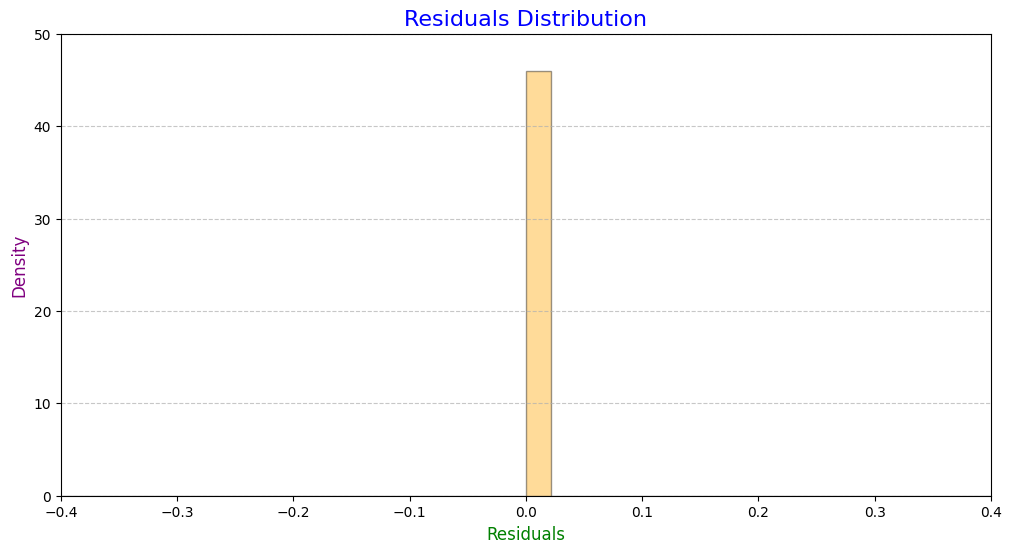


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


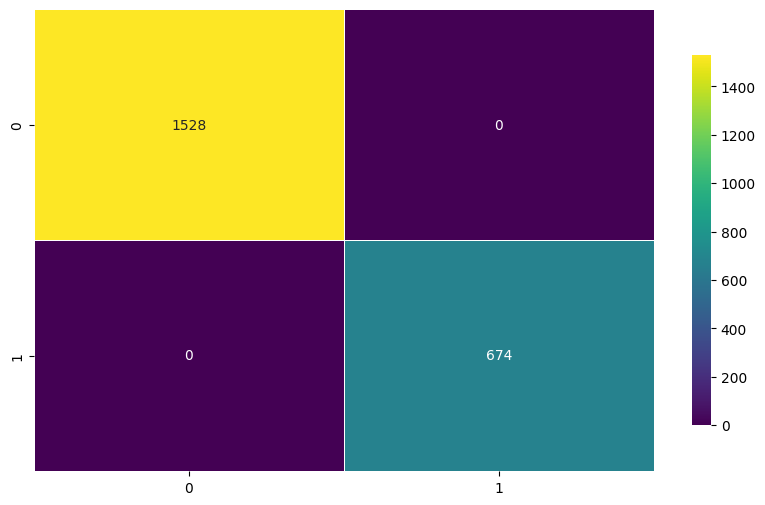

In [143]:
evaluate_model(LogisticRegression(),'Logistic Regression', X_train1, y_train1, X_test1, y_test1)

In [144]:
#2. applying random-forest classifier model

In [145]:
from sklearn.ensemble import RandomForestClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


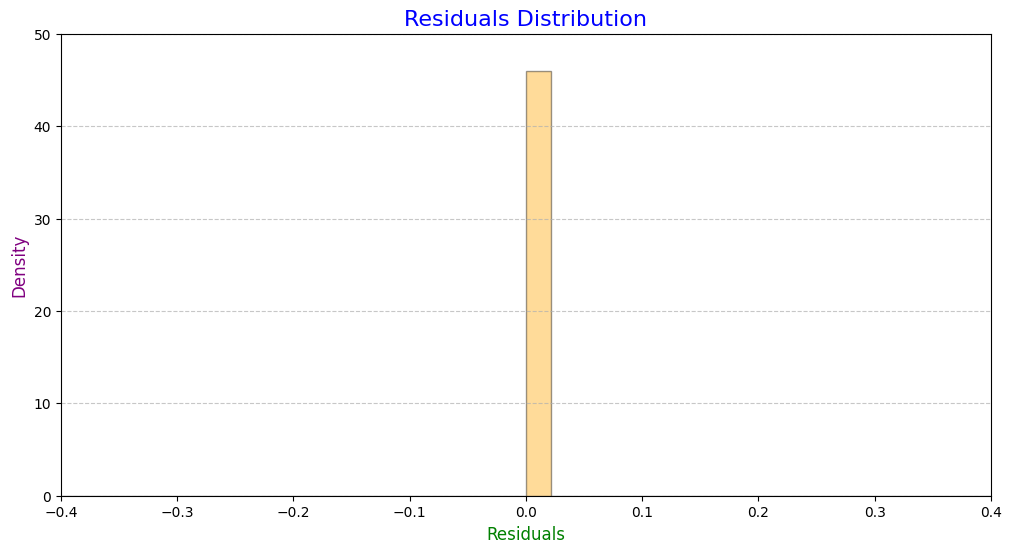


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


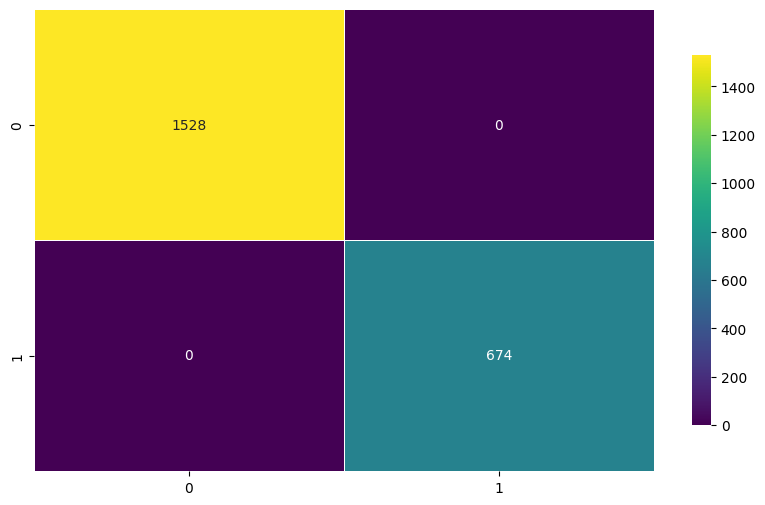

In [146]:
evaluate_model(RandomForestClassifier(), 'Random Forest', X_train, y_train, X_test, y_test)

In [147]:
#3.KNN clasifier Model

In [148]:
from sklearn.neighbors import KNeighborsClassifier

Training score : 1.0
Testing score : 0.9995458673932789
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9978618702129973
MAE : 0.00045413260672116256
MSE : 0.00045413260672116256
RMSE : 0.02131038729636706
MAPE : nan


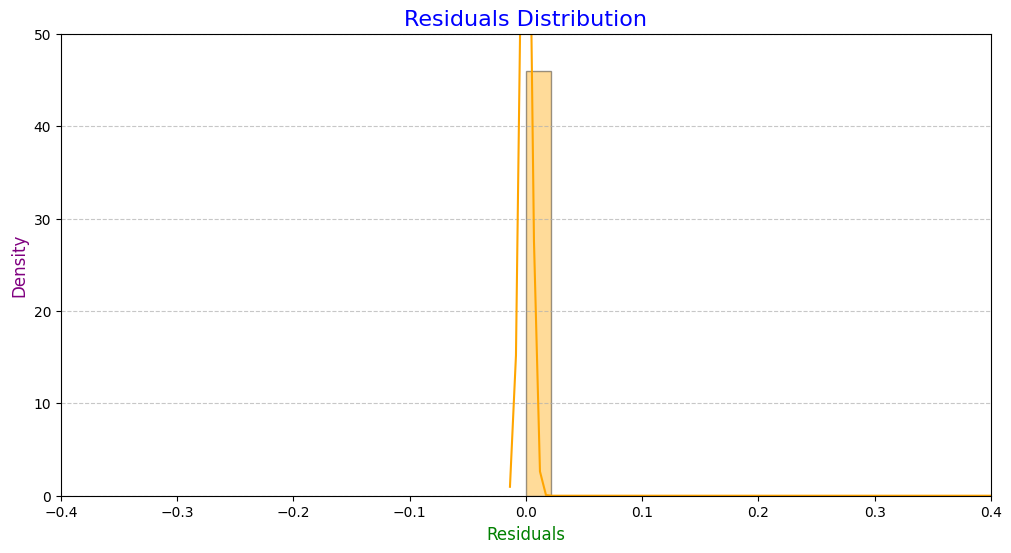


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.95%
Precision Score is: 1.0
Recall Score is: 0.9985163204747775
F1 Score is: 0.9992576095025983

------------------------------------------------------------------------
Confusion Matrix:


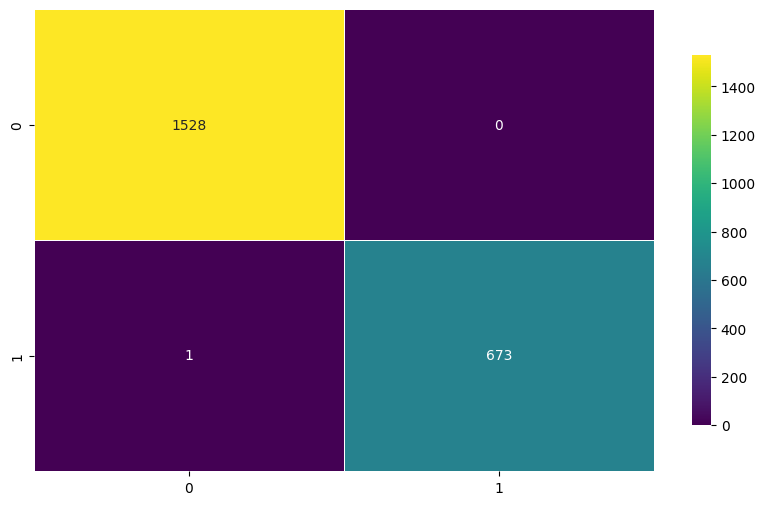

In [149]:
evaluate_model(KNeighborsClassifier(), 'KNN', X_train1, y_train1, X_test1, y_test1)

In [150]:
#4. Suppor-VEctor-Classifier Model

In [150]:
from sklearn.svm import SVC

Training score : 1.0
Testing score : 0.9995458673932789
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9978618702129973
MAE : 0.00045413260672116256
MSE : 0.00045413260672116256
RMSE : 0.02131038729636706
MAPE : nan


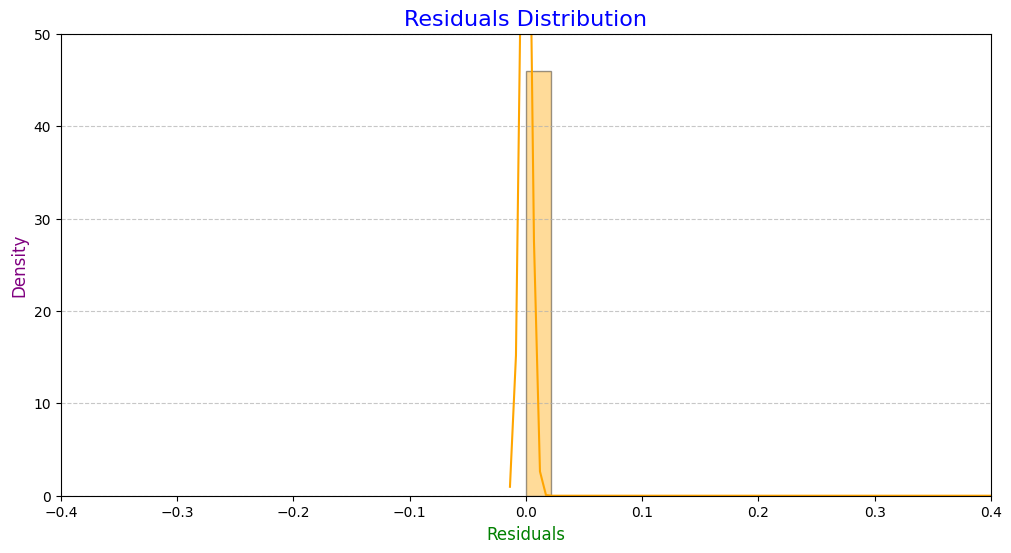


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.95%
Precision Score is: 1.0
Recall Score is: 0.9985163204747775
F1 Score is: 0.9992576095025983

------------------------------------------------------------------------
Confusion Matrix:


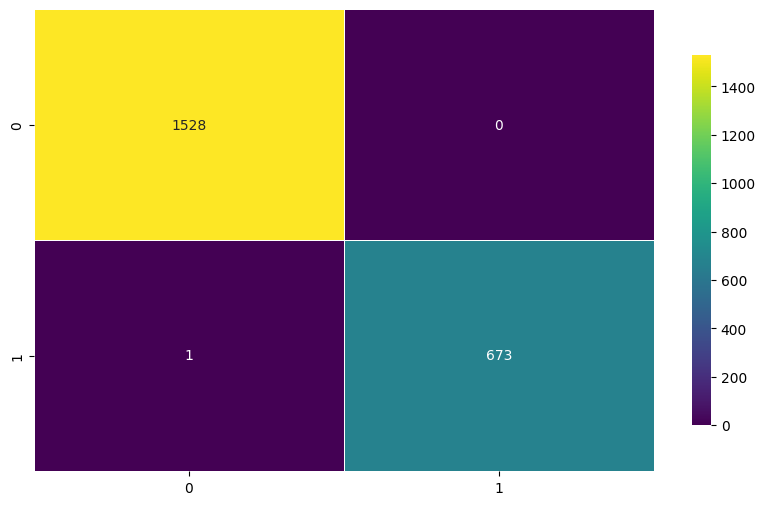

In [151]:
evaluate_model(SVC(), 'SVM', X_train1, y_train1, X_test1, y_test1)

In [152]:
#5. Naive-Bayes Model

In [153]:
from sklearn.naive_bayes import GaussianNB

Training score : 0.9993943981831945
Testing score : 0.9990917347865577
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 0.9957237404259947
MAE : 0.0009082652134423251
MSE : 0.0009082652134423251
RMSE : 0.030137438733945608
MAPE : nan


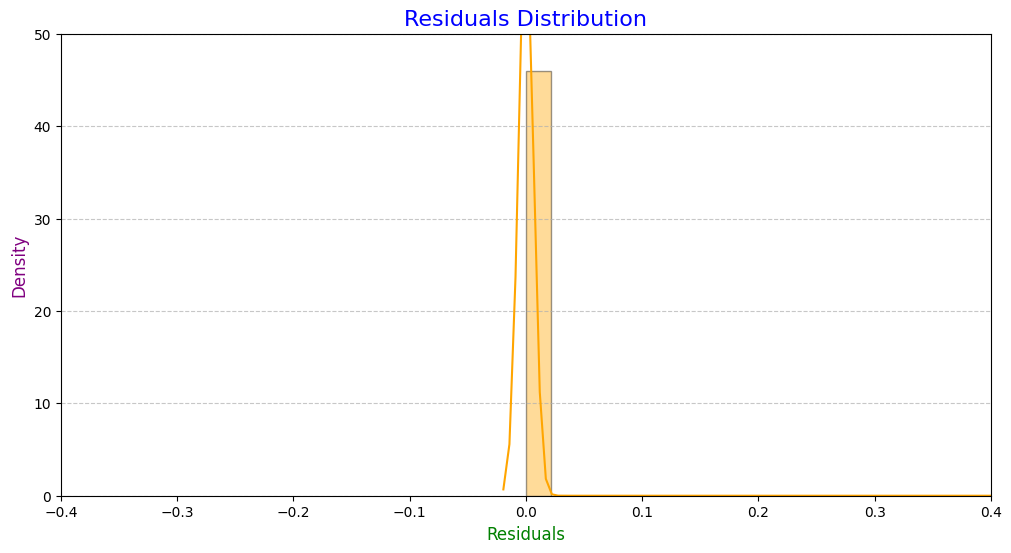


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.91%
Precision Score is: 1.0
Recall Score is: 0.9970326409495549
F1 Score is: 0.9985141158989599

------------------------------------------------------------------------
Confusion Matrix:


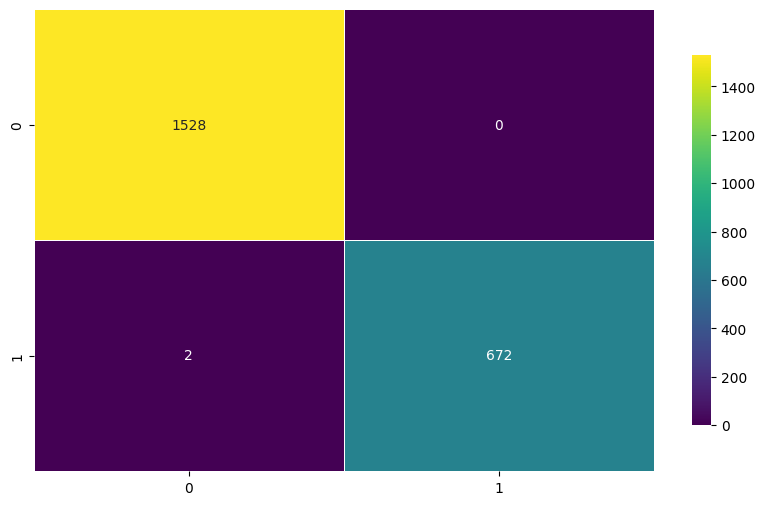

In [154]:
evaluate_model(GaussianNB(), 'Naive Bayes', X_train1, y_train1, X_test1, y_test1)

In [155]:
#6. Decision-Tree-Classifier Model

In [156]:
from sklearn.tree import DecisionTreeClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


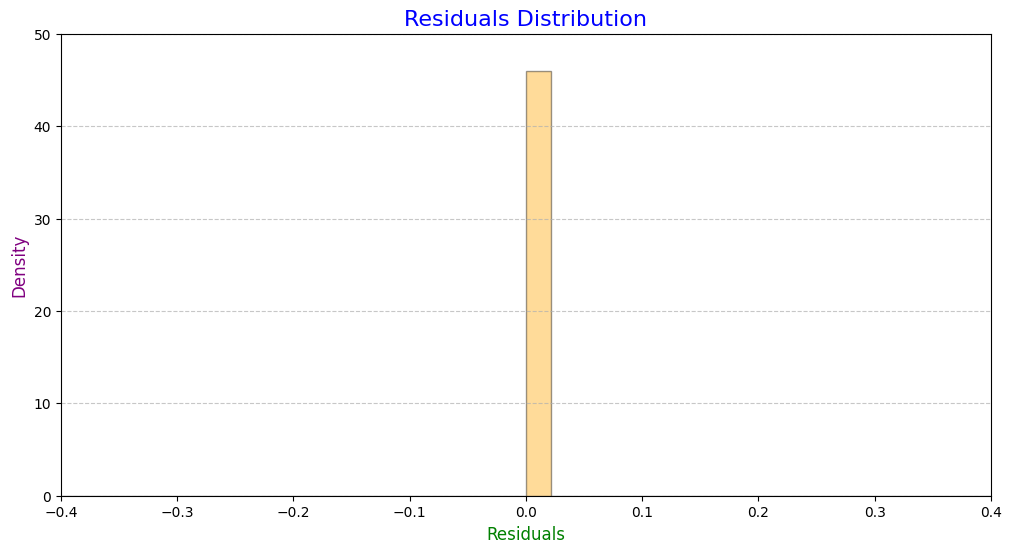


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


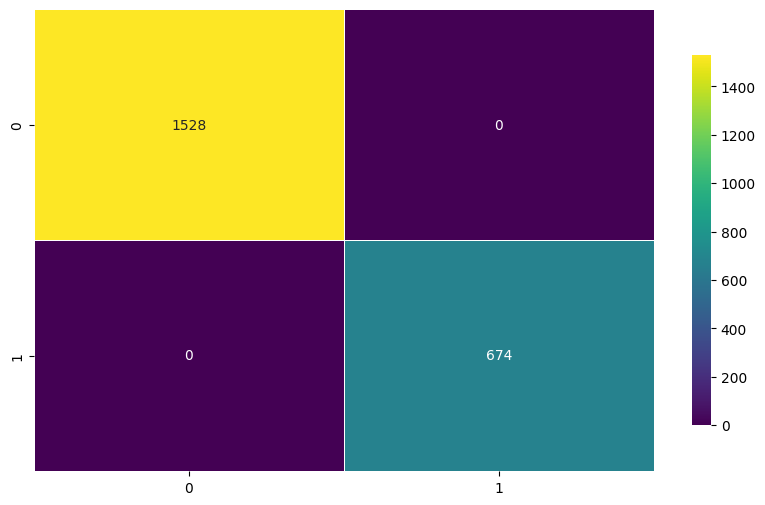

In [157]:
evaluate_model(DecisionTreeClassifier(), 'Descision Tree', X_train, y_train, X_test, y_test)

In [150]:
#7. Ada-Boost-Classifier Model

In [158]:
from sklearn.ensemble import AdaBoostClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


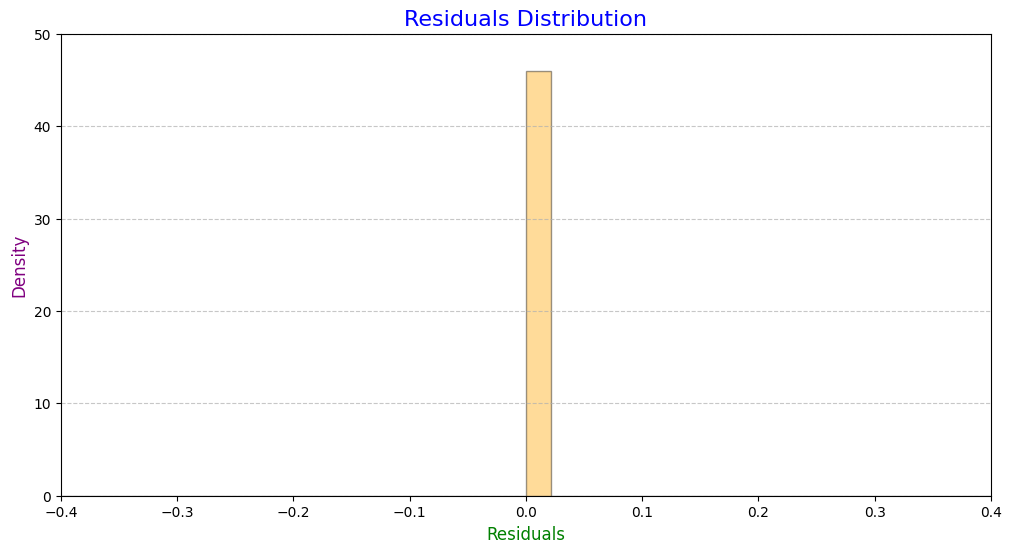


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


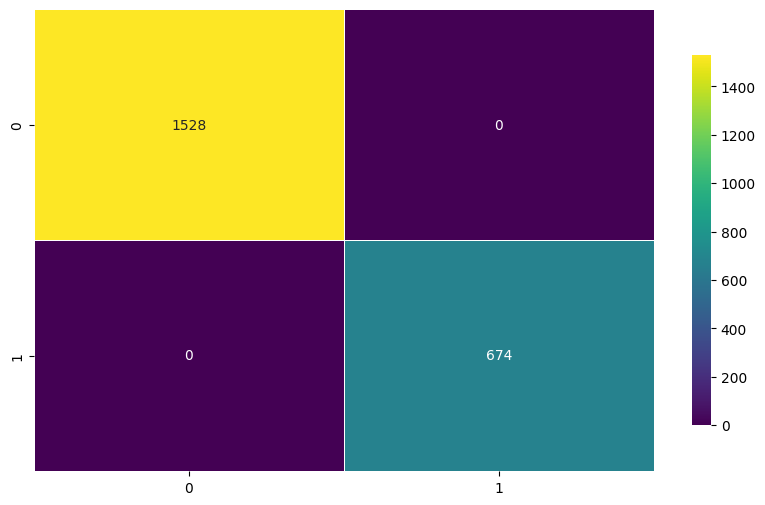

In [159]:
evaluate_model(AdaBoostClassifier(), 'Ada Boost', X_train, y_train, X_test, y_test)

In [160]:
#8. Gradient-Boosting-Classifier Model

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


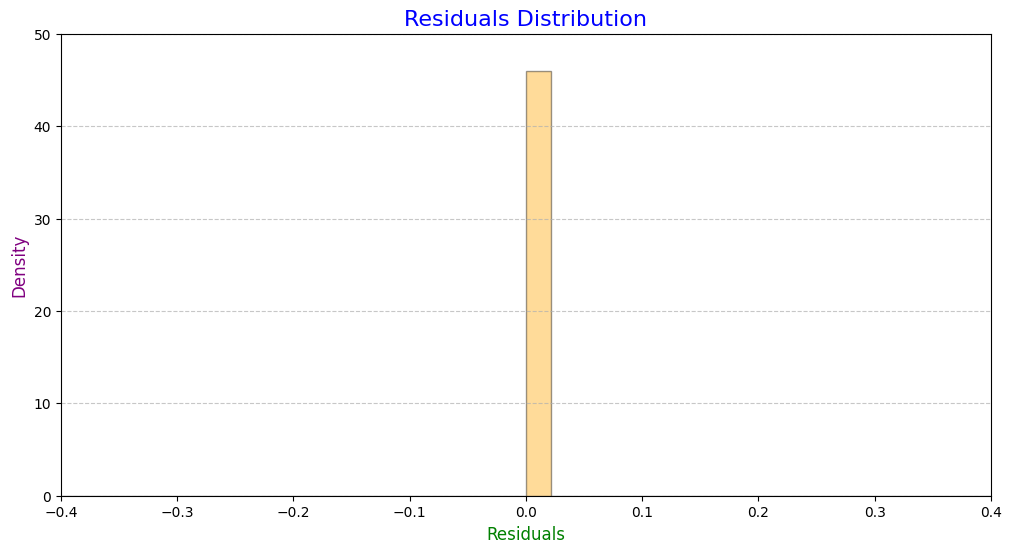


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


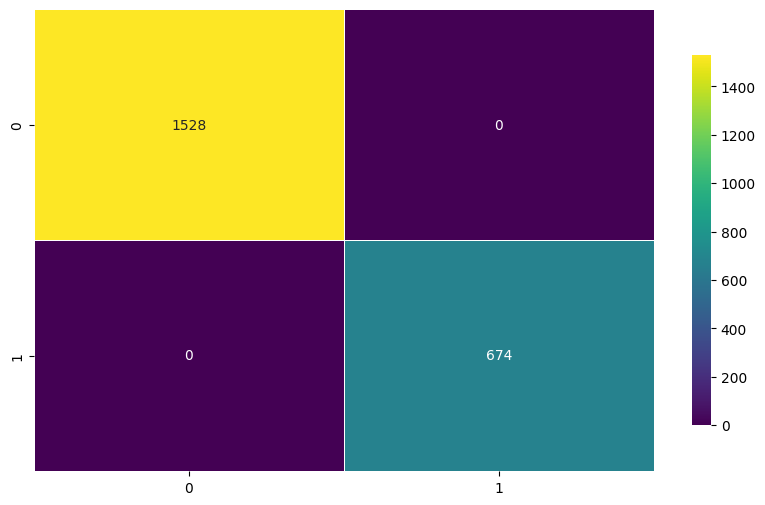

In [162]:
evaluate_model(GradientBoostingClassifier(), 'Gradient Boost', X_train, y_train, X_test, y_test)

In [163]:
#9. LGMB Classifier Model

In [164]:
from lightgbm import LGBMClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


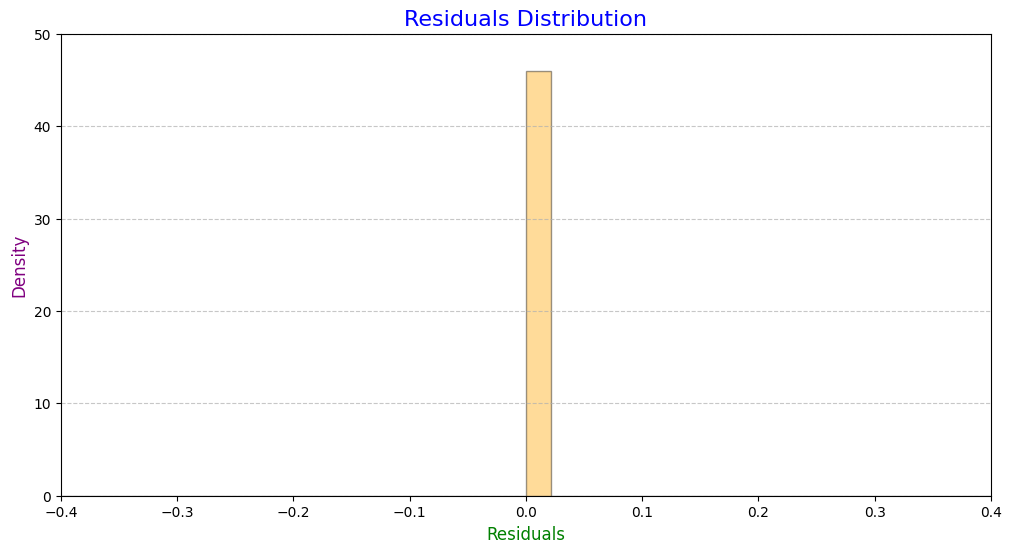


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


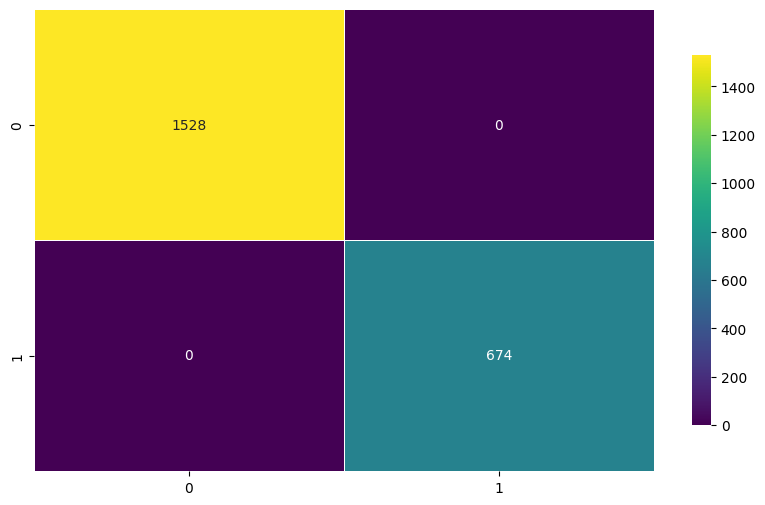

In [165]:
evaluate_model(LGBMClassifier(verbose=-1),'LGBM', X_train, y_train, X_test, y_test)

In [166]:
#10. XGB Classifier Model

In [167]:
from xgboost import XGBClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 0 1 ... 0 0 0]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


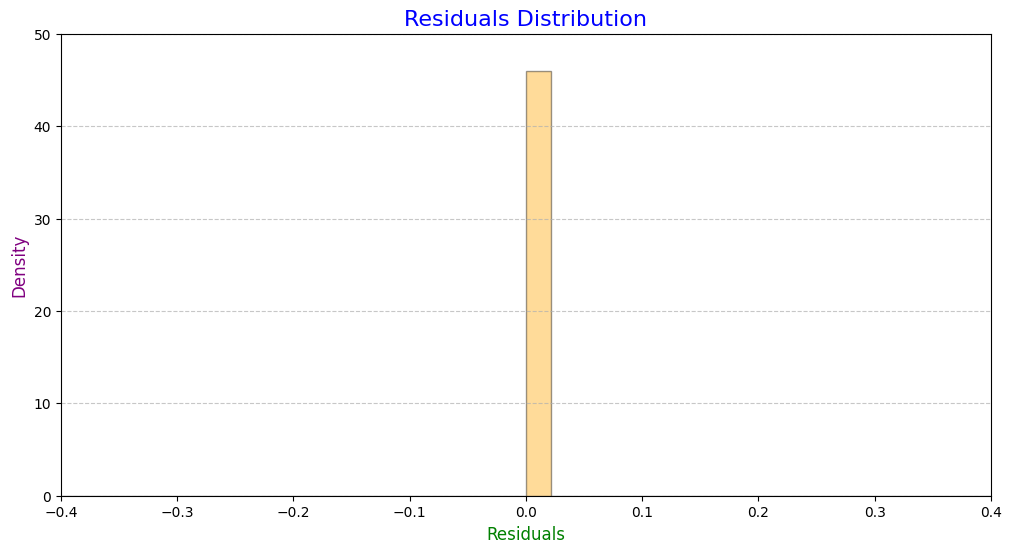


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


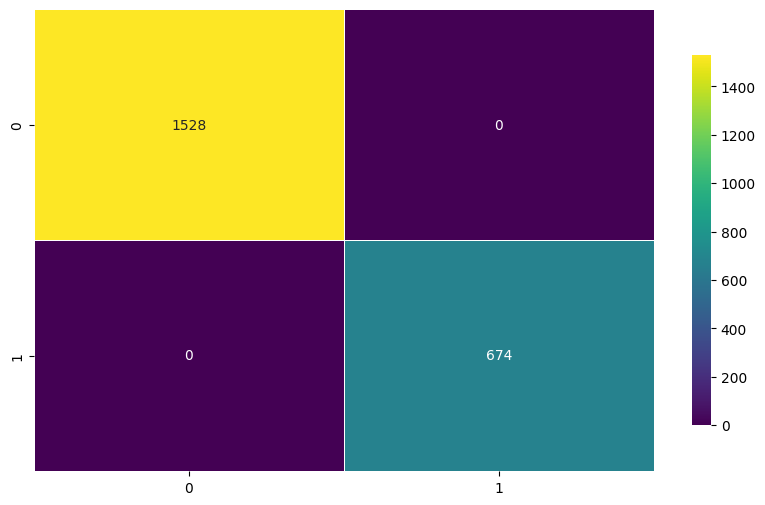

In [168]:
evaluate_model(XGBClassifier(),'XG Boost', X_train, y_train, X_test, y_test)

In [169]:
#11. Cat-Boost-Classifier Model

In [170]:
from catboost import CatBoostClassifier

Learning rate set to 0.023069
0:	learn: 0.6120724	total: 162ms	remaining: 2m 41s
1:	learn: 0.5400585	total: 169ms	remaining: 1m 24s
2:	learn: 0.4775293	total: 175ms	remaining: 58.2s
3:	learn: 0.4210741	total: 180ms	remaining: 44.9s
4:	learn: 0.3768020	total: 185ms	remaining: 36.9s
5:	learn: 0.3311176	total: 191ms	remaining: 31.6s
6:	learn: 0.2970215	total: 196ms	remaining: 27.8s
7:	learn: 0.2618455	total: 203ms	remaining: 25.2s
8:	learn: 0.2355514	total: 210ms	remaining: 23.1s
9:	learn: 0.2106821	total: 216ms	remaining: 21.3s
10:	learn: 0.1904331	total: 221ms	remaining: 19.8s
11:	learn: 0.1729845	total: 226ms	remaining: 18.6s
12:	learn: 0.1537573	total: 232ms	remaining: 17.6s
13:	learn: 0.1373927	total: 237ms	remaining: 16.7s
14:	learn: 0.1237233	total: 242ms	remaining: 15.9s
15:	learn: 0.1106310	total: 247ms	remaining: 15.2s
16:	learn: 0.0986093	total: 252ms	remaining: 14.6s
17:	learn: 0.0891728	total: 257ms	remaining: 14s
18:	learn: 0.0796575	total: 261ms	remaining: 13.5s
19:	learn: 

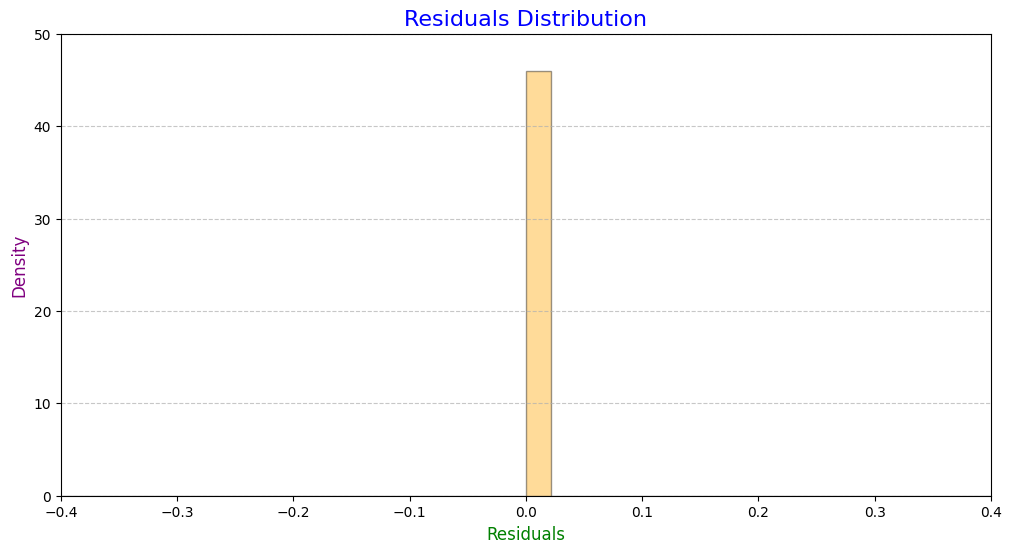


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


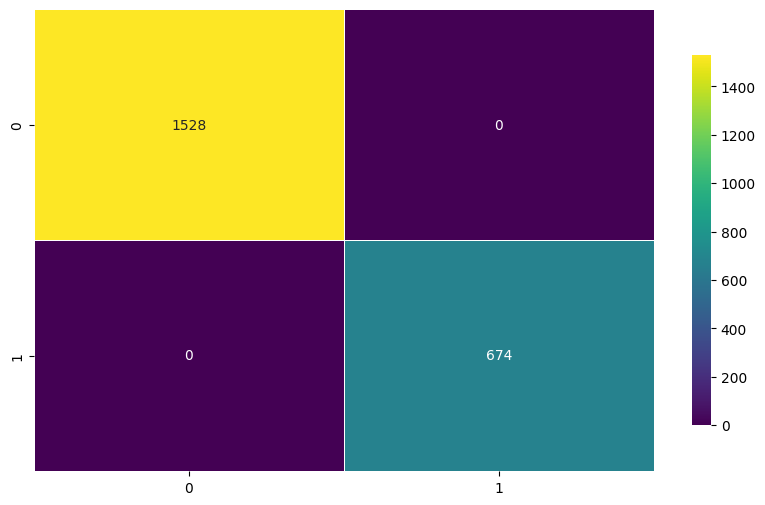

In [171]:
evaluate_model(CatBoostClassifier(),'Cat Boost', X_train, y_train, X_test, y_test)

In [172]:
df_results = pd.DataFrame(evaluation_results)

In [173]:
df_results

,Model,Training Score,Testing Score
0,Logistic Regression,1.000000,1.000000
1,Random Forest,1.000000,1.000000
2,KNN,1.000000,0.999546
3,SVM,1.000000,0.999546
4,Naive Bayes,0.999394,0.999092
5,Descision Tree,1.000000,1.000000
6,Ada Boost,1.000000,1.000000
7,Gradient Boost,1.000000,1.000000
8,LGBM,1.000000,1.000000
9,XG Boost,1.000000,1.000000


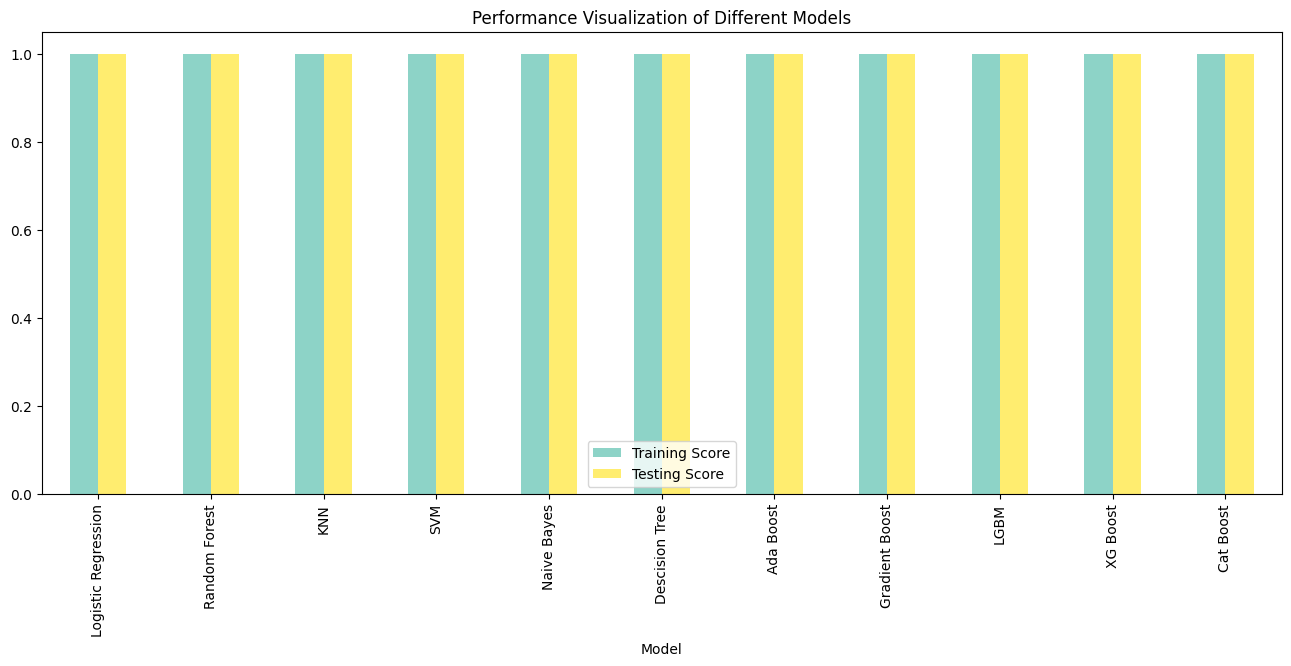

In [174]:
df_results.plot(x="Model",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set3")
plt.show()